## Data Exploration of UAT data
Initial Exploratory Data Analysis of the UAT data. 

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from IPython.display import display

# prep the environment
data_dir = Path.cwd() / "data"
data_file = data_dir / "uat_data.pkl"

%matplotlib inline


In [15]:
# load the UAT runtime data
if data_file.exists():
    uat_df = pd.read_pickle(data_file)
    print(f"Found {len(uat_df)} records.")
else:
    print(f"Processed data file missing ({data_file}), please run the Data Prep notebook first.")
    exit(-1)


Found 1888 records.


### RowCount

There are a lot of rows with a count of 0, so these might be records to be excluded as not real report queries?


RowCount has a range of 0 to 657343, with an average of 2227.79


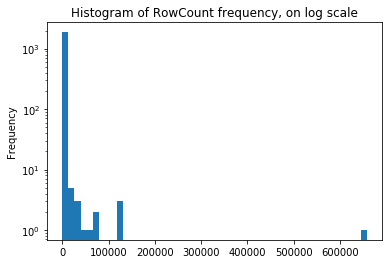

In [16]:
slicer = 'RowCount'
df_slice = uat_df[slicer]
print(f"{slicer} has a range of {df_slice.min()} to {df_slice.max()}, with an average of {df_slice.mean():.2f}")
fig, ax = plt.subplots()
df_slice.plot.hist(ax=ax, bins=50)
ax.set_title(f"Histogram of {slicer} frequency, on log scale")
ax.set_yscale('log')


### ByteCount

There are a lot of rows with a count of 0, so these might be records to be excluded as not real report queries?


ByteCount has a range of 0 to 127798652, with an average of 292869.52


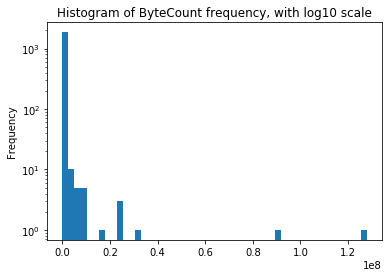

In [17]:
slicer = 'ByteCount'
df_slice = uat_df[slicer]
print(f"{slicer} has a range of {df_slice.min()} to {df_slice.max()}, with an average of {df_slice.mean():.2f}")
fig, ax = plt.subplots()
df_slice.plot.hist(ax=ax, bins=50)
ax.set_title(f"Histogram of {slicer} frequency, with log10 scale")
ax.set_yscale('log')


### ResultStatus


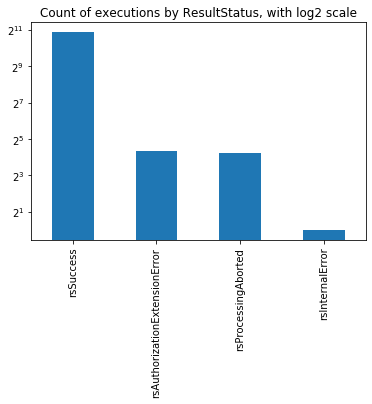

In [18]:
slicer = 'ResultStatus'
df_slice = uat_df[slicer].value_counts()
fig, ax = plt.subplots()
df_slice.plot.bar(ax=ax, x=slicer)
ax.set_title(f"Count of executions by {slicer}, with log2 scale")
ax.set_yscale('log', basey=2)


### User


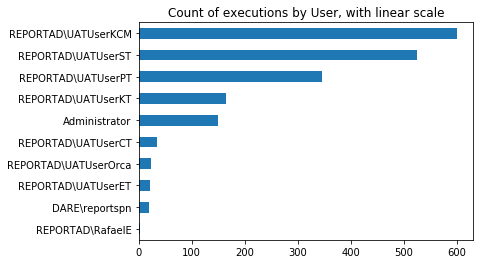

In [19]:
slicer = 'User'
df_slice = uat_df[slicer].value_counts()
fig, ax = plt.subplots()
df_slice.plot.barh(ax=ax)
ax.set_title(f"Count of executions by {slicer}, with linear scale")
ax.invert_yaxis()


### Format


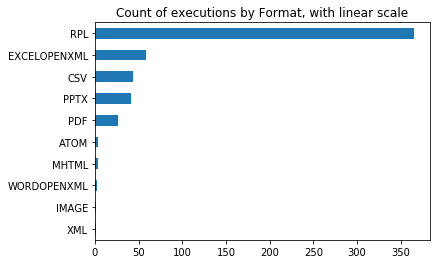

In [20]:
slicer = 'Format'
df_slice = uat_df[slicer].value_counts()
fig, ax = plt.subplots()
df_slice.plot.barh(ax=ax)
ax.set_title(f"Count of executions by {slicer}, with linear scale")
ax.invert_yaxis()


### ReportName, ReportGroup & DurationTotal


Text(0.5, 1.0, 'Correlation Matrix')

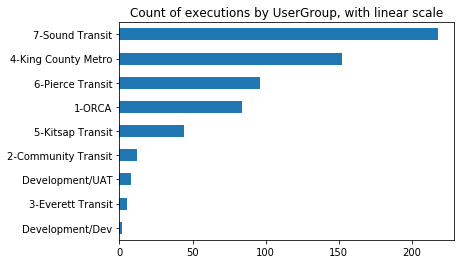

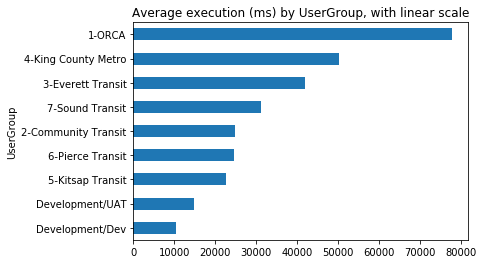

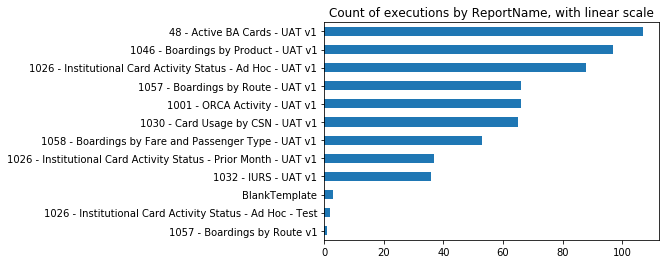

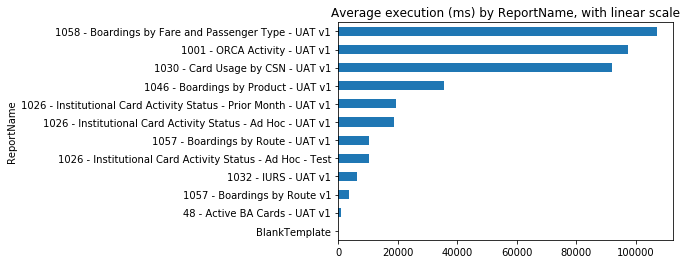

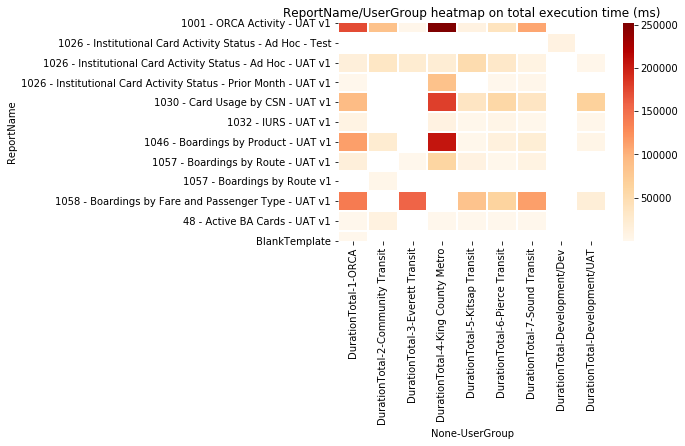

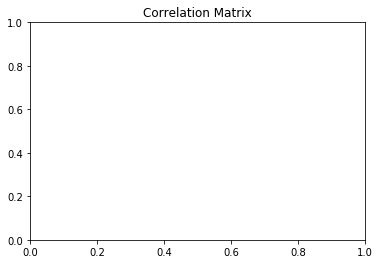

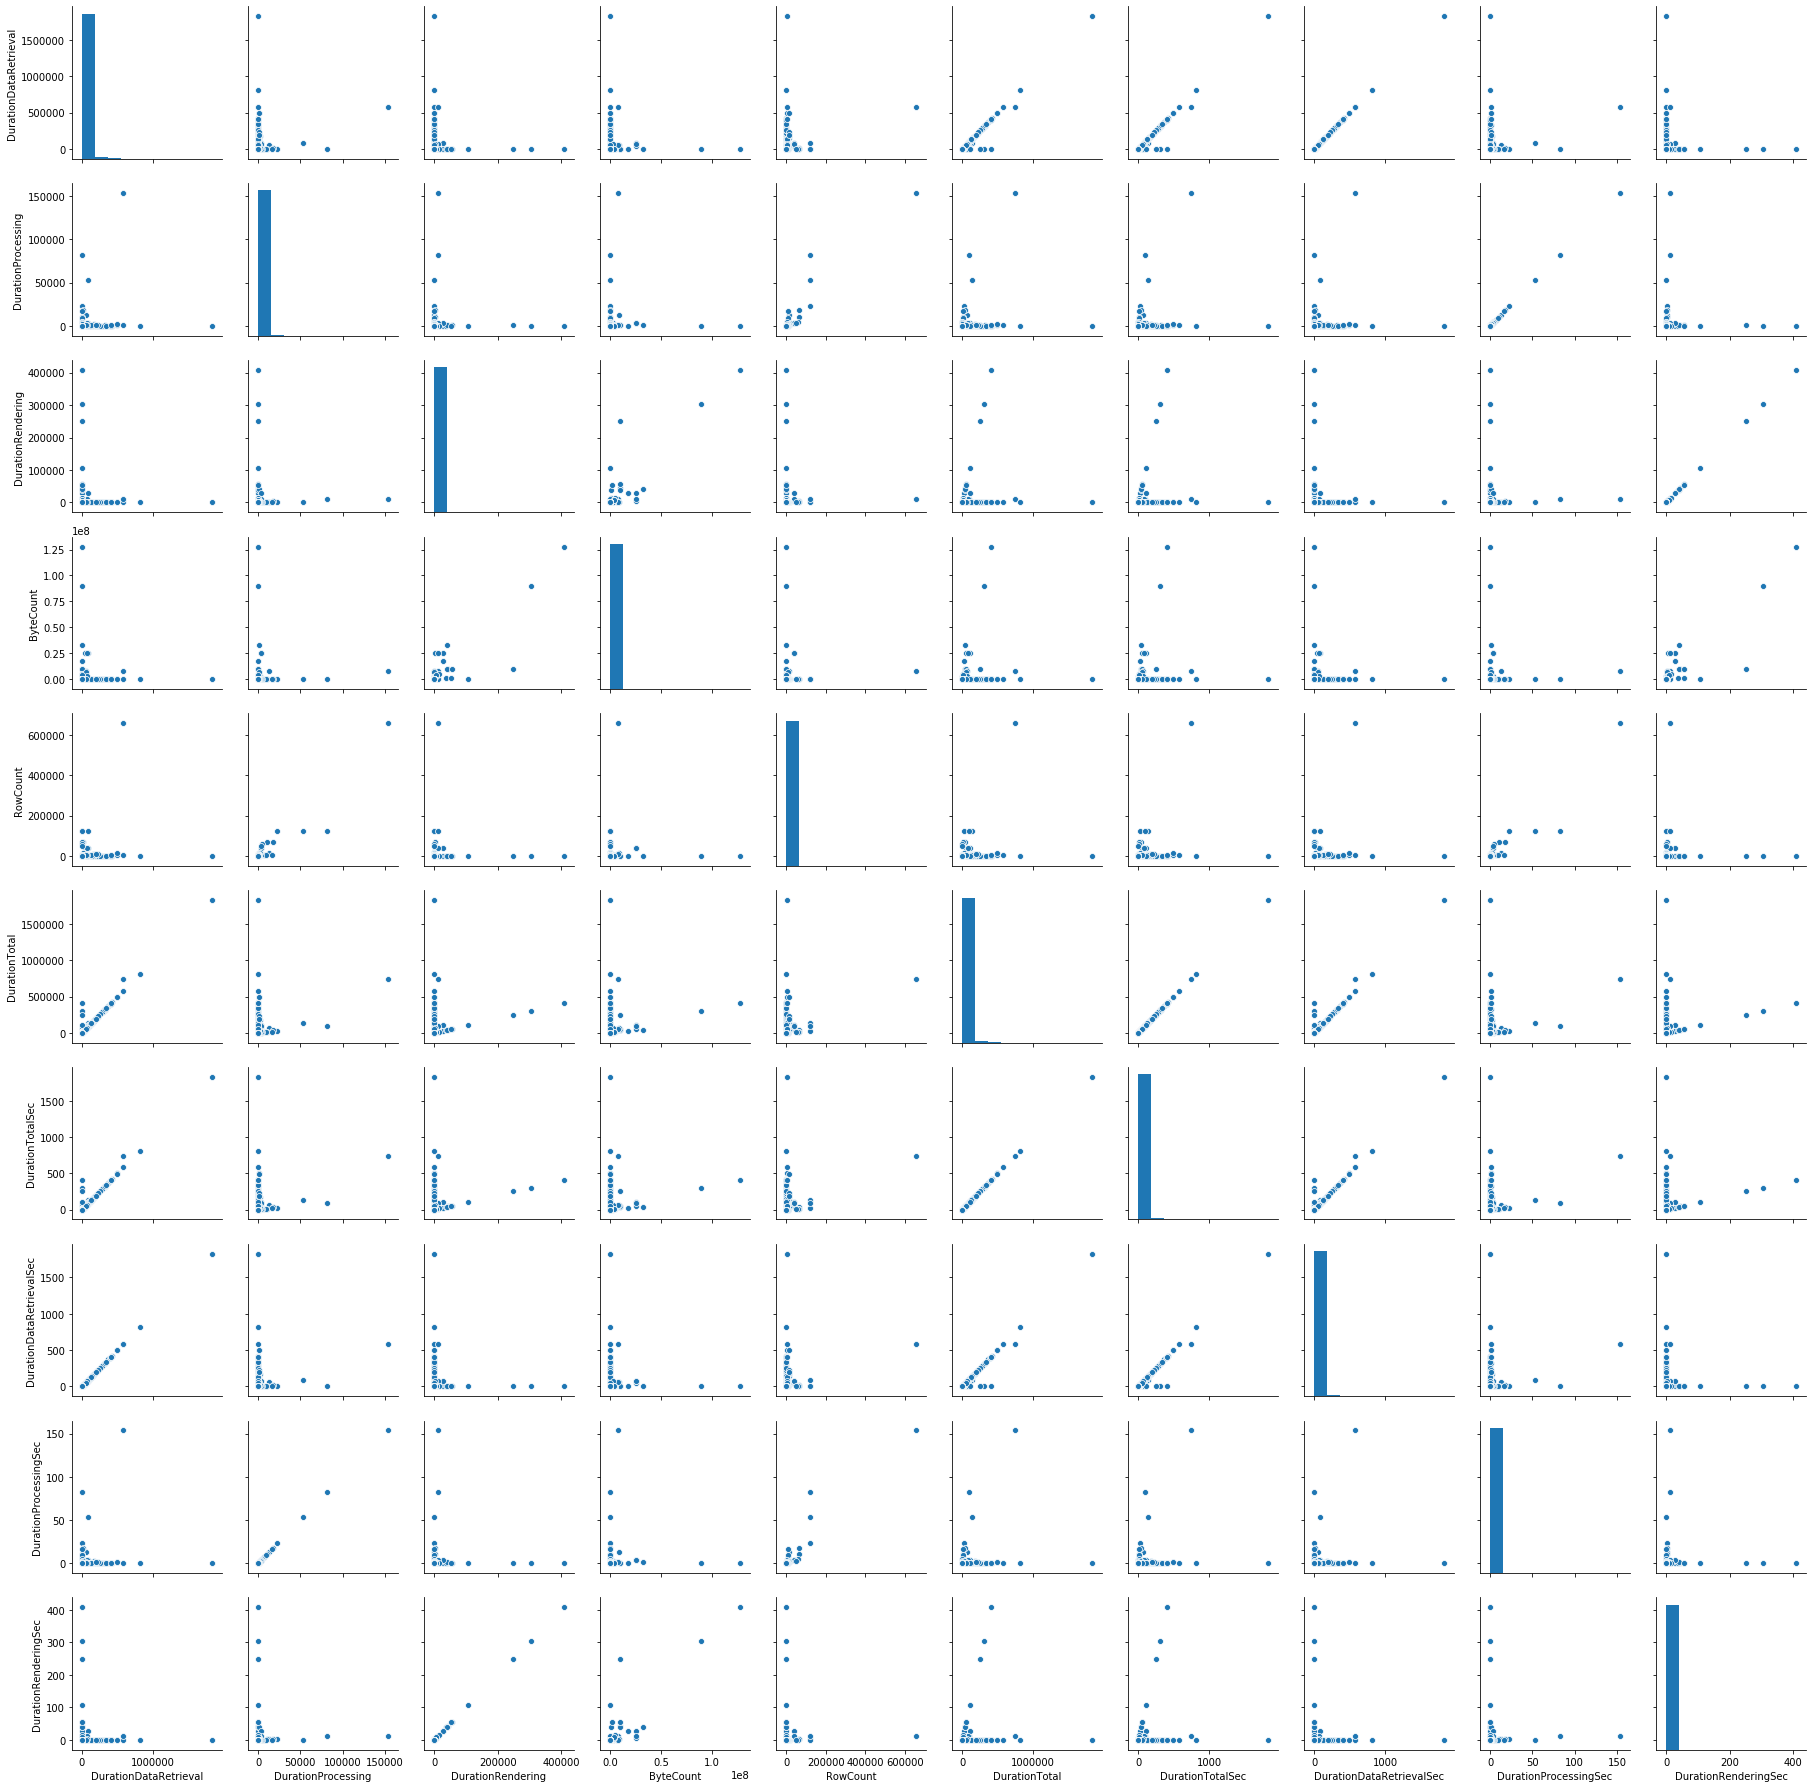

In [21]:
slicer = ['ReportName', 'ReportGroup', 'DurationTotal']

subslicer = 'ReportGroup'
df_slice = uat_df[slicer]
group_rn = df_slice[subslicer].value_counts()
fig, ax = plt.subplots()
group_rn.plot.barh(ax=ax)
ax.set_title(f"Count of executions by {subslicer}, with linear scale")
ax.invert_yaxis()

fig, ax = plt.subplots()
df_slice.groupby(subslicer)['DurationTotal'].mean().sort_values(ascending=False).plot.barh(ax=ax)
ax.set_title(f"Average execution (ms) by {subslicer}, with linear scale")
ax.invert_yaxis()

subslicer = 'ReportName'
df_slice = uat_df[slicer]
group_rn = df_slice[subslicer].value_counts()
fig, ax = plt.subplots()
group_rn.plot.barh(ax=ax)
ax.set_title(f"Count of executions by {subslicer}, with linear scale")
ax.invert_yaxis()

fig, ax = plt.subplots()
df_slice.groupby(subslicer)['DurationTotal'].mean().sort_values(ascending=False).plot.barh(ax=ax)
ax.set_title(f"Average execution (ms) by {subslicer}, with linear scale")
ax.invert_yaxis()

fig, ax = plt.subplots()
sns.heatmap(df_slice.groupby(['ReportName', 'ReportGroup']).mean().unstack(), cmap='OrRd',
    linewidth=1)
ax.set_title("ReportName/ReportGroup heatmap on total execution time (ms)")
# plt.show()

# fig, ax = plt.figure(figsize=(5,5))
fig, ax = plt.subplots()
sns.pairplot(uat_df)
ax.set_title("Correlation Matrix")
# plt.show()

### Requests over Time


Text(0.5, 1.0, 'Activity over time, in 30min buckets')

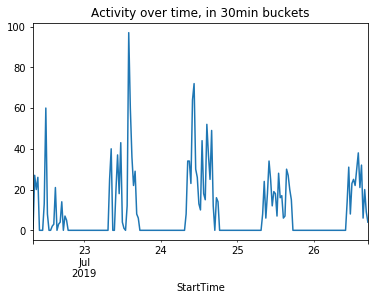

In [22]:
fig, ax = plt.subplots()
time_df = uat_df.set_index('StartTime')
thirtymin_df = time_df.resample('30T').count()
thirtymin_df['ReportPath'].plot()
ax.set_title("Activity over time, in 30min buckets")


### General Observations


/Users/mcclure/PycharmProjects/dare_analytics/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


Text(0.5, 1.0, 'General Historgrams of the results, on a log10 scale')

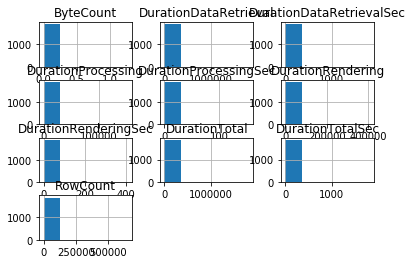

In [23]:
fig, ax = plt.subplots()
uat_df.hist(ax=ax, bins=5)
ax.set_yscale('log')
ax.set_title(f"General Historgrams of the results, on a log10 scale")


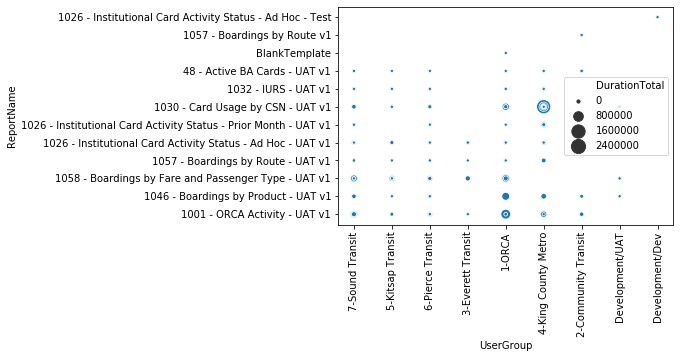

In [24]:
ax = sns.scatterplot(x=uat_df['ReportGroup'], y=uat_df['ReportName'], data=uat_df['ReportName'].value_counts(), size=uat_df['DurationTotal'], sizes=(10,200))
plt.xticks(rotation=90)
plt.show()
# sns.heatmap(df_slice)


#### Raw data
This is a dump of the data I'm working with, for 2 different ExecutionId. With so many rows for a single Execution ID, 
I wonder what all the different records mean, and whether only some of them are important or relevant.

For each field I'm looking for help identifying which rows should be ignored, and which should be aggregated in some way.
Perhaps some of the /ParticipantDim report queries are part of the view structure? 

(The information is duplicated here, once as a base text format and once in a nicer to read table... read the table)


In [25]:
df = uat_df[['ReportPath', 'User', 'ExecutionId', 'RequestType', 'Format', 'Parameters', 'ItemAction', 'StartTime', 'StopTime', 'DurationDataRetrieval', 'DurationProcessing', 'DurationRendering', 'Source', 'ResultStatus', 'ByteCount', 'RowCount', 'AdditionalInfo']]
id_list = ['jg2klv55fhtldh3jonqm2bfk', '0rekrh2bn5fzur45qiog0h45', 'y33wsyn1ck5upl2puewr0nyu', 'kbk0pxnsnkndzf45ooipp245']
for eid in id_list:
    display(f"ExecutionId == {eid}")
    display(df[df['ExecutionId'] == eid])

'ExecutionId == jg2klv55fhtldh3jonqm2bfk'

,ReportPath,User,ExecutionId,RequestType,Format,Parameters,ItemAction,StartTime,StopTime,DurationDataRetrieval,DurationProcessing,DurationRendering,Source,ResultStatus,ByteCount,RowCount,AdditionalInfo
3140,/6-Pierce Transit/1046 - Boardings by Product ...,Administrator,jg2klv55fhtldh3jonqm2bfk,Interactive,RPL,ServiceParticipantDimKey=143&SourceParticipant...,Render,2019-07-26 15:24:14.450,2019-07-26 15:24:18.603,4051,37,37,Live,rsSuccess,44418,1174,<AdditionalInfo><ProcessingEngine>2</Processin...
3141,/ParticipantDim,Administrator,jg2klv55fhtldh3jonqm2bfk,Interactive,NaN,NaN,Execute,2019-07-26 15:24:14.450,2019-07-26 15:24:18.603,6,5,0,Live,rsSuccess,0,179,<AdditionalInfo><SharedDataSet>Inline</SharedD...


'ExecutionId == 0rekrh2bn5fzur45qiog0h45'

,ReportPath,User,ExecutionId,RequestType,Format,Parameters,ItemAction,StartTime,StopTime,DurationDataRetrieval,DurationProcessing,DurationRendering,Source,ResultStatus,ByteCount,RowCount,AdditionalInfo
3142,/1-ORCA/1058 - Boardings by Fare and Passenger...,REPORTAD\UATUserKCM,0rekrh2bn5fzur45qiog0h45,Interactive,RPL,ServiceParticipantDimKey=23&SourceParticipantD...,Render,2019-07-26 15:22:51.247,2019-07-26 15:25:02.887,131201,375,26,Live,rsSuccess,45241,3466,<AdditionalInfo><ProcessingEngine>2</Processin...
3143,/ParticipantDim,REPORTAD\UATUserKCM,0rekrh2bn5fzur45qiog0h45,Interactive,NaN,NaN,Execute,2019-07-26 15:22:51.247,2019-07-26 15:25:02.887,2,9,0,Live,rsSuccess,0,179,<AdditionalInfo><SharedDataSet>Inline</SharedD...
3144,/ParticipantDim,REPORTAD\UATUserKCM,0rekrh2bn5fzur45qiog0h45,Interactive,NaN,NaN,Execute,2019-07-26 15:22:51.247,2019-07-26 15:25:02.887,2,4,0,Live,rsSuccess,0,179,<AdditionalInfo><SharedDataSet>Inline</SharedD...


'ExecutionId == y33wsyn1ck5upl2puewr0nyu'

,ReportPath,User,ExecutionId,RequestType,Format,Parameters,ItemAction,StartTime,StopTime,DurationDataRetrieval,DurationProcessing,DurationRendering,Source,ResultStatus,ByteCount,RowCount,AdditionalInfo
2878,/1-ORCA/1026 - Institutional Card Activity Sta...,Administrator,y33wsyn1ck5upl2puewr0nyu,Interactive,RPL,AgencyDimKey=3&InstitutionDimKey=492&BranchDim...,Render,2019-07-25 16:44:33.293,2019-07-25 16:44:33.480,49,59,18,Live,rsSuccess,15674,2298,<AdditionalInfo><ProcessingEngine>2</Processin...
2879,/InstitutionDim,Administrator,y33wsyn1ck5upl2puewr0nyu,Interactive,NaN,NaN,Execute,2019-07-25 16:44:33.293,2019-07-25 16:44:33.480,0,9,0,Cache,rsSuccess,0,2273,<AdditionalInfo><SharedDataSet>Inline</SharedD...


'ExecutionId == kbk0pxnsnkndzf45ooipp245'

,ReportPath,User,ExecutionId,RequestType,Format,Parameters,ItemAction,StartTime,StopTime,DurationDataRetrieval,DurationProcessing,DurationRendering,Source,ResultStatus,ByteCount,RowCount,AdditionalInfo
2993,/4-King County Metro/1030 - Card Usage by CSN ...,REPORTAD\UATUserKCM,kbk0pxnsnkndzf45ooipp245,Interactive,RPL,AgencyDimKey=5&InstitutionDimKey=57&FromDate=6...,Render,2019-07-26 12:48:59.360,2019-07-26 12:50:15.677,76214,34,18,Live,rsSuccess,25062,2282,<AdditionalInfo><ProcessingEngine>2</Processin...
2994,/AgencyDim,REPORTAD\UATUserKCM,kbk0pxnsnkndzf45ooipp245,Interactive,NaN,NaN,Execute,2019-07-26 12:48:59.360,2019-07-26 12:50:15.677,6,4,0,Live,rsSuccess,1173,8,<AdditionalInfo><SharedDataSet>Inline</SharedD...
2995,/InstitutionDim,REPORTAD\UATUserKCM,kbk0pxnsnkndzf45ooipp245,Interactive,NaN,NaN,Execute,2019-07-26 12:48:59.360,2019-07-26 12:50:15.677,0,19,0,Cache,rsSuccess,0,2273,<AdditionalInfo><SharedDataSet>Inline</SharedD...
2996,/4-King County Metro/1030 - Card Usage by CSN ...,REPORTAD\UATUserKCM,kbk0pxnsnkndzf45ooipp245,Interactive,RPL,AgencyDimKey=5&InstitutionDimKey=17&FromDate=6...,Render,2019-07-26 12:51:54.503,2019-07-26 12:52:50.760,54319,820,1063,Live,rsSuccess,7416679,12023,<AdditionalInfo><ProcessingEngine>2</Processin...
2997,/AgencyDim,REPORTAD\UATUserKCM,kbk0pxnsnkndzf45ooipp245,Interactive,NaN,NaN,Execute,2019-07-26 12:51:54.503,2019-07-26 12:52:50.760,1,3,0,Live,rsSuccess,1173,8,<AdditionalInfo><SharedDataSet>Inline</SharedD...
2998,/InstitutionDim,REPORTAD\UATUserKCM,kbk0pxnsnkndzf45ooipp245,Interactive,NaN,NaN,Execute,2019-07-26 12:51:54.503,2019-07-26 12:52:50.760,0,19,0,Cache,rsSuccess,0,2273,<AdditionalInfo><SharedDataSet>Inline</SharedD...
2999,/4-King County Metro/1030 - Card Usage by CSN ...,REPORTAD\UATUserKCM,kbk0pxnsnkndzf45ooipp245,Interactive,RPL,AgencyDimKey=5&InstitutionDimKey=95&Institutio...,Render,2019-07-26 12:55:50.723,2019-07-26 12:56:45.007,54082,16,15,Live,rsSuccess,24270,2319,<AdditionalInfo><ProcessingEngine>2</Processin...
3000,/AgencyDim,REPORTAD\UATUserKCM,kbk0pxnsnkndzf45ooipp245,Interactive,NaN,NaN,Execute,2019-07-26 12:55:50.723,2019-07-26 12:56:45.007,6,3,0,Live,rsSuccess,1173,8,<AdditionalInfo><SharedDataSet>Inline</SharedD...
3001,/InstitutionDim,REPORTAD\UATUserKCM,kbk0pxnsnkndzf45ooipp245,Interactive,NaN,NaN,Execute,2019-07-26 12:55:50.723,2019-07-26 12:56:45.007,0,18,0,Cache,rsSuccess,0,2273,<AdditionalInfo><SharedDataSet>Inline</SharedD...
